In [1]:
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of dataframe 
pd.set_option('display.max_columns', 60)

import matplotlib as mpl
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 24

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff

from IPython.core.pylabtools import figsize
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('train.csv')
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,...,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,23783.000000,30471.000000,30471.000000,23786.000000,30471.000000,30471.000000,16030.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30293.000000,30471.000000,3.047100e+04,30471.000000,3.047100e+04,30471.000000,30174.000000,30174.000000,30174.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,84056.425552,0.218922,0.118871,5140.026156,3271.272464,4.065111,5354.269699,8324.970739,4.705031,0.109678,1190.738677,1.320895,0.138295,6.635030,2.896393,0.286732,4.200978,8.253454,1.463062e+05,...,6.122674,12.287979,0.199075,3.876440,20.239310,2.319944,22.769557,10.348669,71.356240,1.401057e+06,30.131863,1.173871e+06,265.528470,765.098467,1278.280635,1021.689513,17.806898,66.195530,73.442421,63.469660,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,57871.285899,0.175090,0.118688,3816.625140,2169.759592,2.993795,3989.640917,4289.734174,3.445105,0.333328,1057.015001,1.492903,0.443796,6.571982,3.290058,1.510491,4.741812,23.536953,2.830251e+05,...,15.413697,25.785241,0.447815,13.188748,18.843867,2.271539,11.208471,5.668748,155.341362,2.303052e+06,23.924051,1.004810e+06,514.538671,152.408951,236.207686,194.117696,33.269057,125.934584,126.167671,124.076662,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,2546.000000,0.001879,0.000000,175.000000,0.000000,0.000000,168.000000,1012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.546000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.520000,0.210000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,300.000000,500.000000,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,7.307411e+06,21819.000000,0.063755,0.019509,1706.000000,1874.000000,2.000000,1564.000000,5782.000000,2.000000,0.000000,520.000000,0.000000,0.000000,1.000000,1.000000,0.000000,

# Start with target variable

Text(0, 0.5, 'Price')

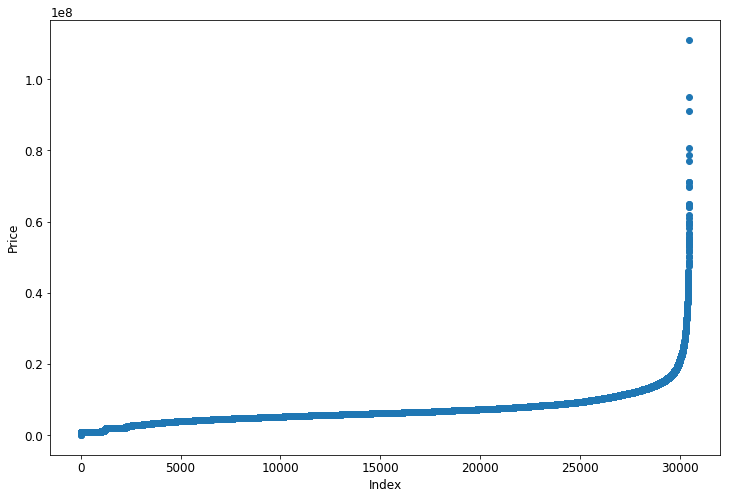

In [3]:
f, ax = plt.subplots(figsize=(12,8))
plt.scatter(range(data.shape[0]), np.sort(data.price_doc.values))
plt.xlabel('Index', fontsize=12)
plt.ylabel('Price', fontsize=12)

Text(0.5, 0, 'Log Price')

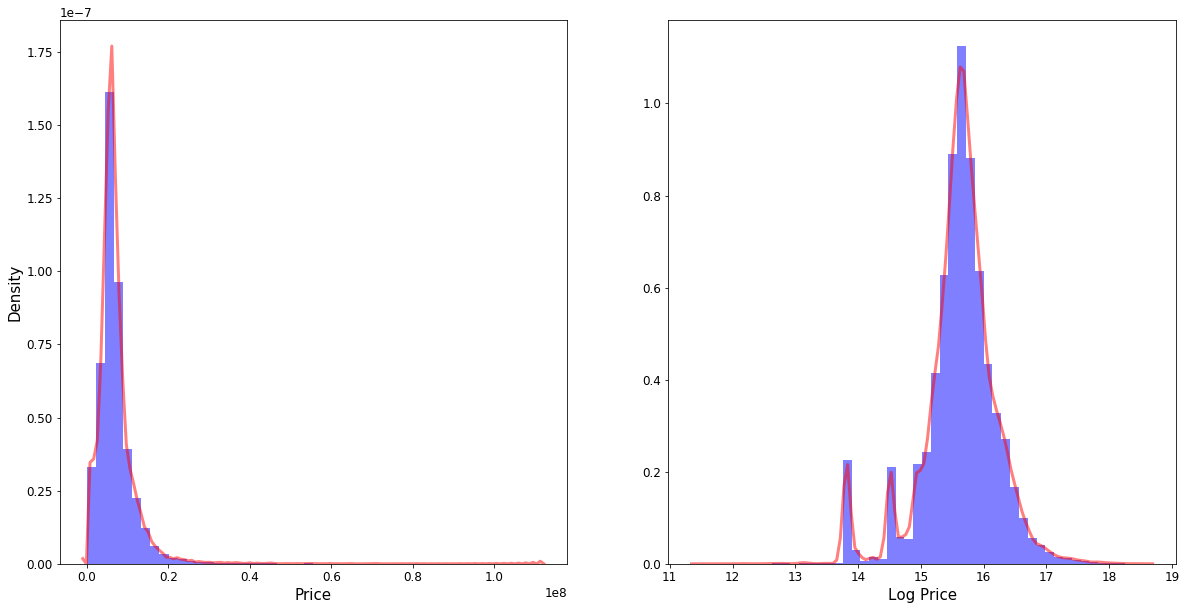

In [8]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.distplot(data.price_doc.values, bins=50, 
                   kde_kws={"color":"r", "lw":3, "alpha":0.5},
                   hist_kws={"linewidth":3, "alpha":0.5, "color":"b"}, ax=ax1)
ax1.set_xlabel('Price', fontsize=15)
ax1.set_ylabel('Density', fontsize=15)
sns.distplot(np.log(data.price_doc.values), bins=50,
                   kde_kws={"color":"r", "lw":3, "alpha":0.5},
                   hist_kws={"linewidth":3, "alpha":0.5, "color":"b"}, ax=ax2)
ax2.set_xlabel('Log Price', fontsize=15)

Text(0, 0.5, 'Median Price')

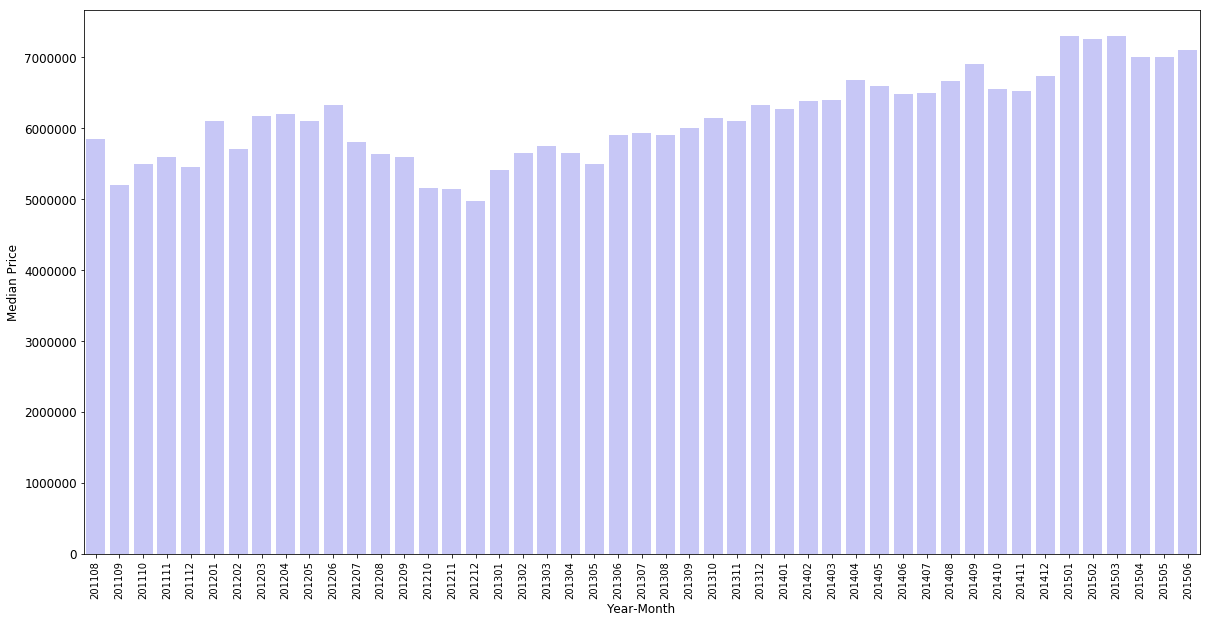

In [10]:
data['yearmonth'] = data['timestamp'].apply(lambda x: x[:4]+x[5:7])
grouped = data.groupby('yearmonth')['price_doc'].aggregate(np.median).reset_index()
f, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation='vertical', fontsize=10)
sns.barplot(grouped.yearmonth.values, grouped.price_doc.values, alpha=0.25, color="blue")
ax.set_xlabel('Year-Month', fontsize=12)
ax.set_ylabel('Median Price', fontsize=12)

# Missing Values 

In [5]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
            columns={0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" 
          "There are " + str(mis_val_table_ren_columns.shape[0]) + 
          " columns that have missing values.")
    return mis_val_table_ren_columns

Your selected dataframe has 292 columns.
There are 51 columns that have missing values.


Text(0.5, 1.0, 'Percent missing data by feature')

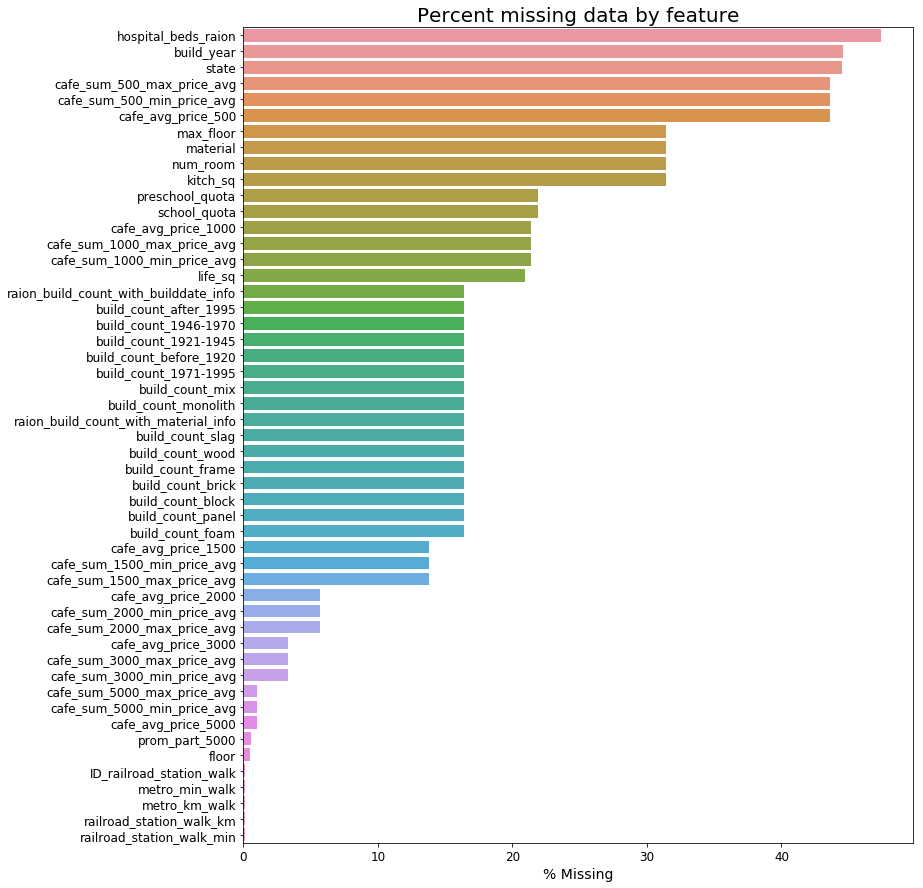

In [9]:
mis_value_tab = missing_values_table(data)
fig, ax = plt.subplots(figsize=(12,15))
sns.barplot(x=mis_value_tab['% of Total Values'], y=mis_value_tab.index)
ax.set_xlabel('% Missing', fontsize=14) 
ax.set_title('Percent missing data by feature', fontsize=20)

# Housing Internal Characteristics

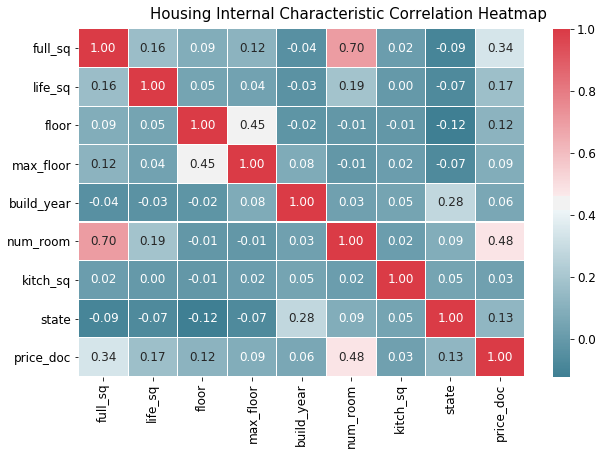

In [20]:
data.loc[data['state'] == 33, 'state'] = data['state'].mode().iloc[0]
data.loc[data['build_year'] == 20052009, 'build_year'] = 2007
internal_chars = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 
                  'num_room', 'kitch_sq', 'state', 'price_doc']
data_internal_chars = data[internal_chars]
f, ax = plt.subplots(figsize=(10,6))
corr_internal_chars = data_internal_chars.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
hm_internal_chars = sns.heatmap(round(corr_internal_chars,2), annot=True, ax=ax,
                    cmap=cmap, fmt='.2f', annot_kws={"size": 12}, linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Housing Internal Characteristic Correlation Heatmap', fontsize=15)

### Area of Home and Number of Rooms

Text(0.5, 1.0, 'Correlation between full_sq and price')

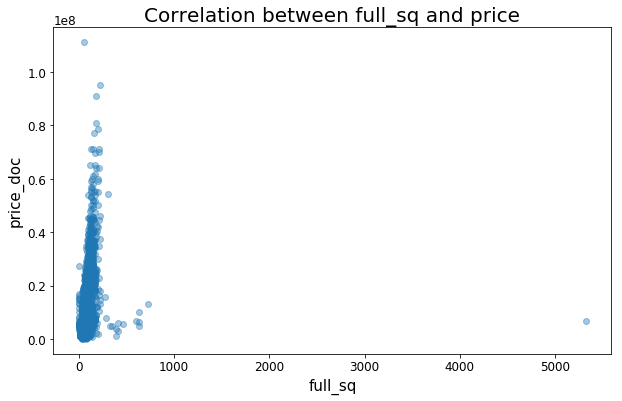

In [21]:
f, ax = plt.subplots(figsize=(10,6))
plt.scatter(x=data['full_sq'], y=data['price_doc'], alpha=0.4)
ax.set_xlabel("full_sq", fontsize=15)
ax.set_ylabel("price_doc", fontsize=15)
ax.set_title('Correlation between full_sq and price', fontdict={'size':20})

Text(0.5, 1.0, 'Correlation between full_sq and price')

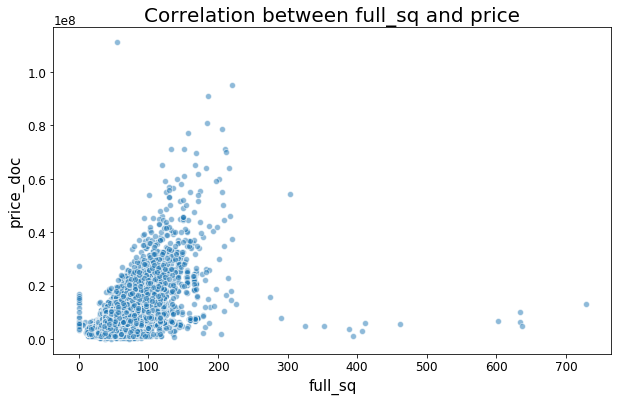

In [22]:
f, ax = plt.subplots(figsize=(10,6))
ind = data[data['full_sq'] > 2000].index
plt.scatter(x=data.drop(ind)['full_sq'], y=data.drop(ind)['price_doc'], alpha=0.5,
            edgecolors='w')
ax.set_xlabel("full_sq", fontsize=15)
ax.set_ylabel("price_doc", fontsize=15)
ax.set_title('Correlation between full_sq and price', fontdict={'size':20})

Text(0.5, 1.0, 'Jittering with stripplot')

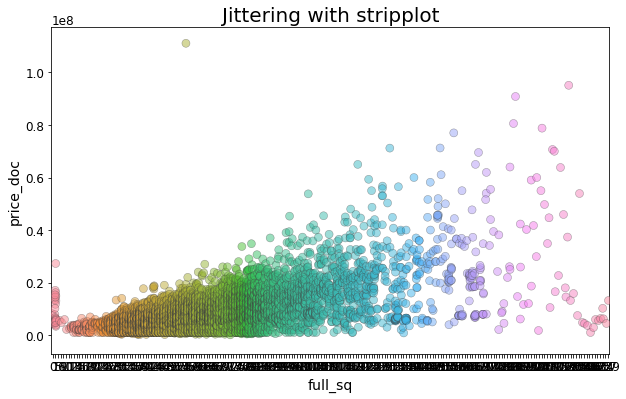

In [13]:
f, ax = plt.subplots(figsize=(10,6))
ind = data[data['full_sq'] > 2000].index
sns.stripplot(data.drop(ind)['full_sq'], data.drop(ind)['price_doc'],
              jitter=0.25, size=8, ax=ax, linewidth=.5, alpha=0.5, edgecolor="gray")
plt.title('Jittering with stripplot', fontsize=20)

To avoid the problem of points overlap is the increase the size of the dot depending on how many points lie in that spot. Larger the size of the point more is the concentration of points around that

Text(0.5, 1.0, 'Counts plot - Size of circle is bigger as more points overlaps')

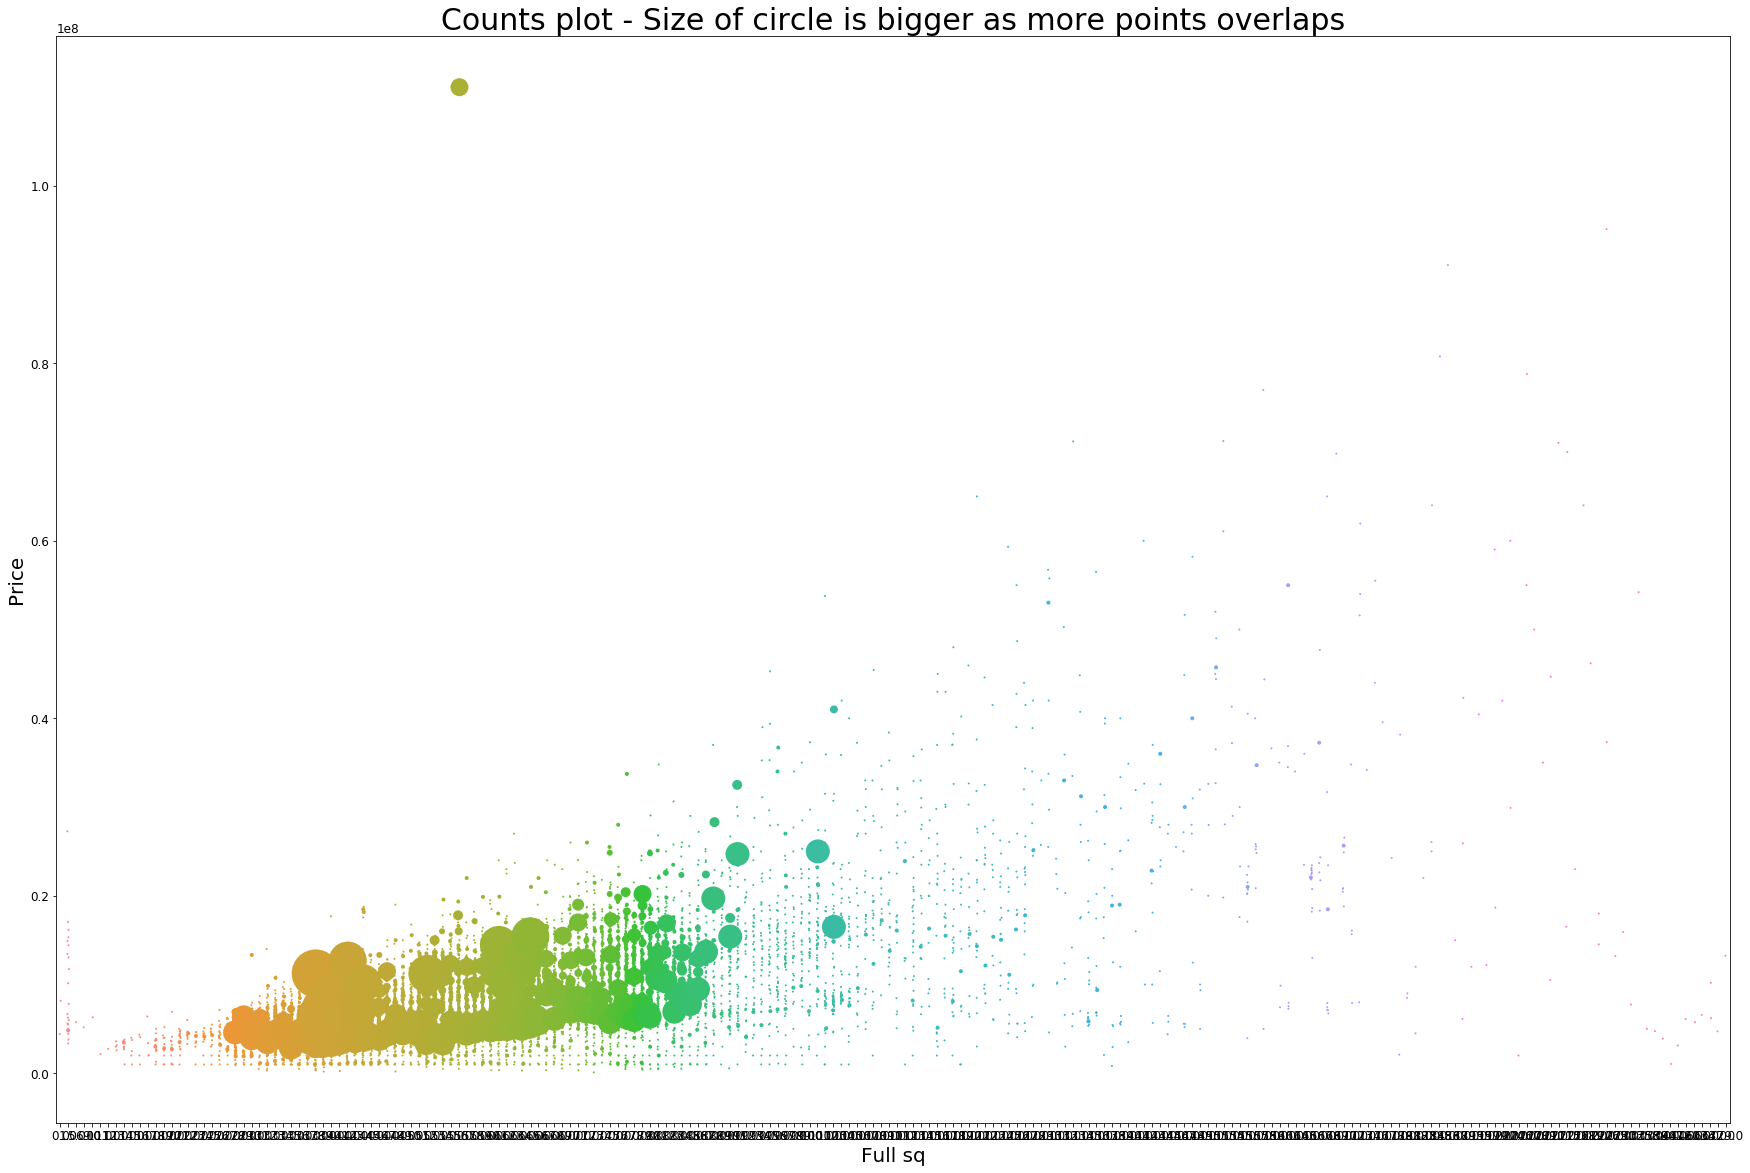

In [21]:
ind = data[data['full_sq'] > 2000].index
full_sq_counts = data.groupby([data.drop(ind)['full_sq'], data.drop(ind)['price_doc']]).size().reset_index(name='counts')
f, ax = plt.subplots(figsize=(30,20))
sns.stripplot(full_sq_counts.full_sq, full_sq_counts.price_doc, 
              size=full_sq_counts.counts*2, ax=ax)
ax.set_xlabel('Full sq', fontsize=20)
ax.set_ylabel('Price', fontsize=20)
ax.set_title('Counts plot - Size of circle is bigger as more points overlaps', fontsize=30)

/home/tungutokyo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



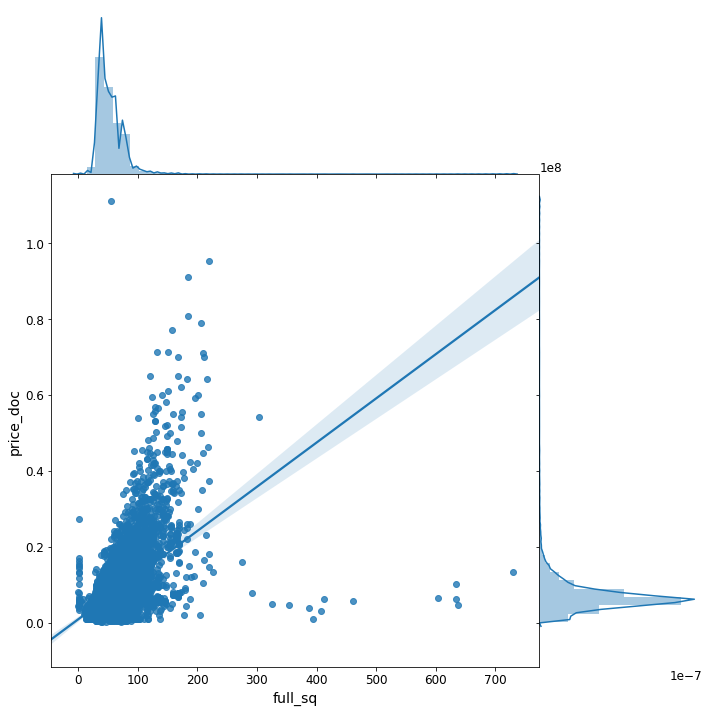

In [15]:
ind = data[data['full_sq'] > 2000].index
sns.jointplot(data.drop(ind)['full_sq'], y=data.drop(ind)['price_doc'], 
kind='reg', space=0, height=10, ratio=3)

In [16]:
(data['life_sq'] > data['full_sq']).sum()

37

Text(0.5, 1.0, 'Distribution of room count')

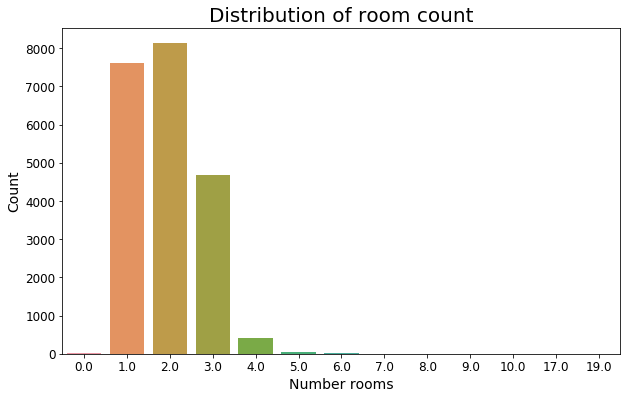

In [23]:
f, ax = plt.subplots(figsize=(10,6))
sns.countplot(x=data['num_room'])
ax.set_xlabel('Number rooms', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of room count', fontsize=20)

### Sale Types

Text(0.5, 1.0, 'OwnerOccupier')

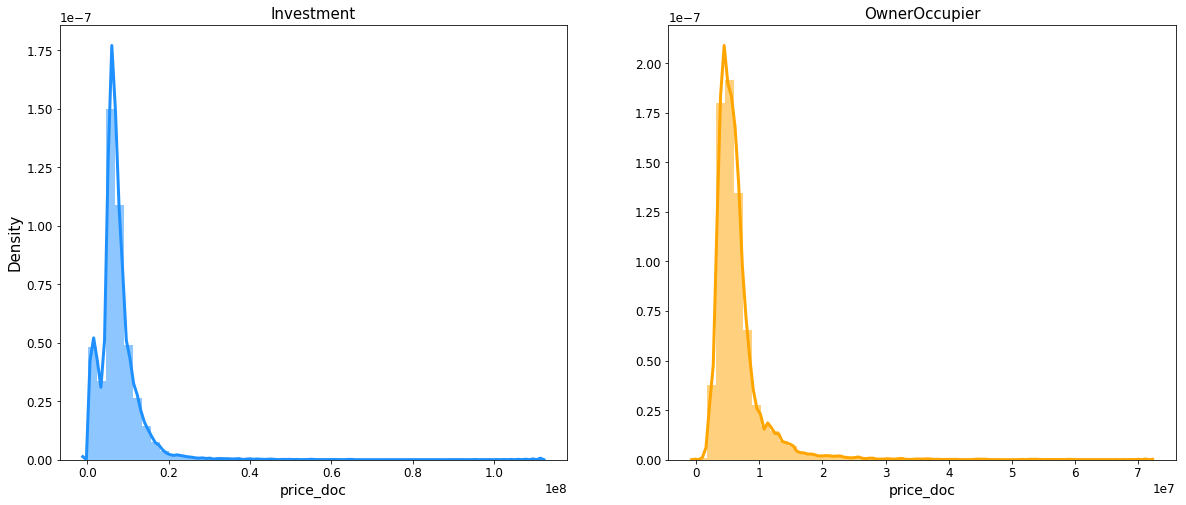

In [24]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.distplot(data.loc[data['product_type'] == 'Investment', "price_doc"], color = "dodgerblue",
             label="Investment", hist_kws={'alpha':.5}, kde_kws={'linewidth':3}, ax=ax1)
ax1.set_ylabel('Density', fontsize=15)
ax1.set_title('Investment', fontsize=15)
sns.distplot(data.loc[data['product_type'] == 'OwnerOccupier', "price_doc"], color = "orange",
             label="OwnerOccupier", hist_kws={'alpha':.5}, kde_kws={'linewidth':3}, ax=ax2)
ax2.set_title('OwnerOccupier', fontsize=15)

In [25]:
data.groupby('product_type')['price_doc'].median()

product_type
Investment       6670000
OwnerOccupier    5564090
Name: price_doc, dtype: int64

### Build Year

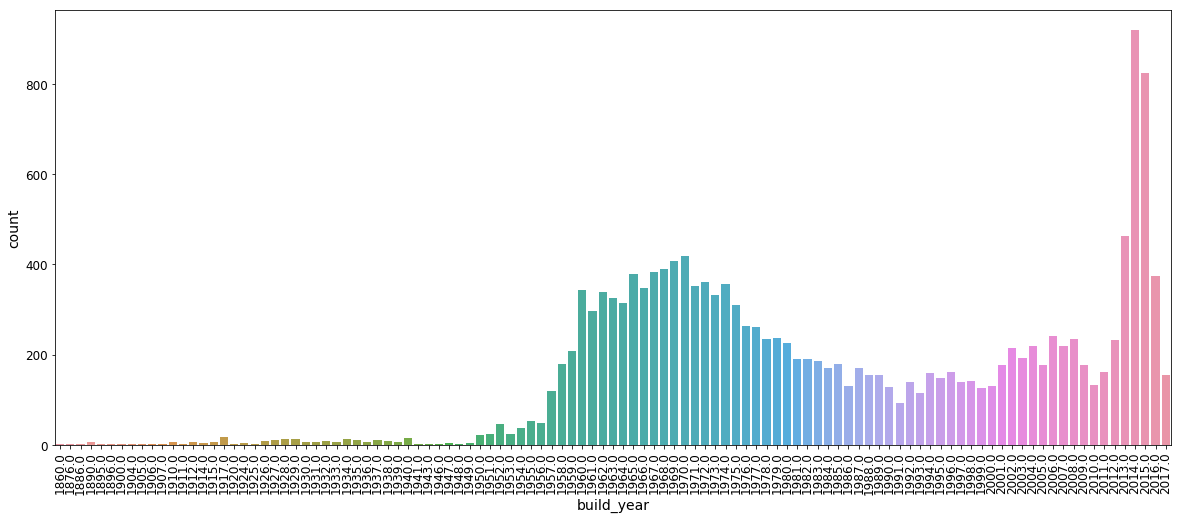

In [29]:
f, ax = plt.subplots(figsize=(20,8))
plt.xticks(rotation='90')
ind = data[(data['build_year'] <= 1691) | (data['build_year'] >= 2018)].index
data_build = data.drop(ind).sort_values(by=['build_year'])
sns.countplot(x=data_build['build_year'])

Text(0.5, 1.0, 'Mean Price by year of build')

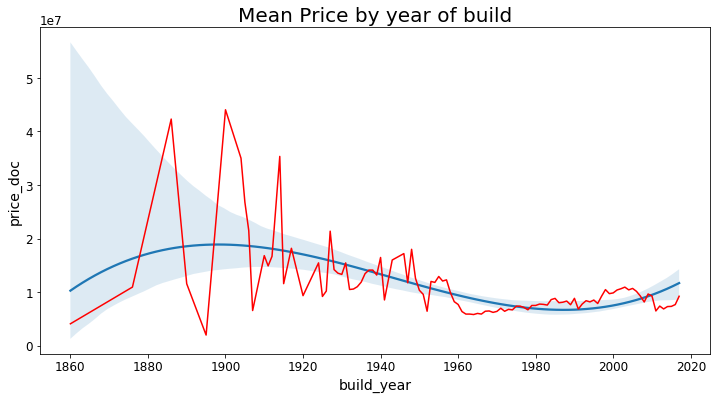

In [31]:
f, ax = plt.subplots(figsize=(12,6))
price_year = data_build.groupby('build_year')[['build_year', 'price_doc']].mean()
sns.regplot(x="build_year", y="price_doc", data=price_year, scatter=False, 
            order=3, truncate=True)
plt.plot(price_year['build_year'], price_year['price_doc'], color='r')
ax.set_title('Mean Price by year of build', fontsize=20)

The relationship appears somewhat steady over time, especially after 1960. There is some volatility in the earlier years. This is not a real effect but simple due to the sparseness of observations around 1950 

### Timestamp 

Text(0.5, 1.0, 'Sales Volumnn over time')

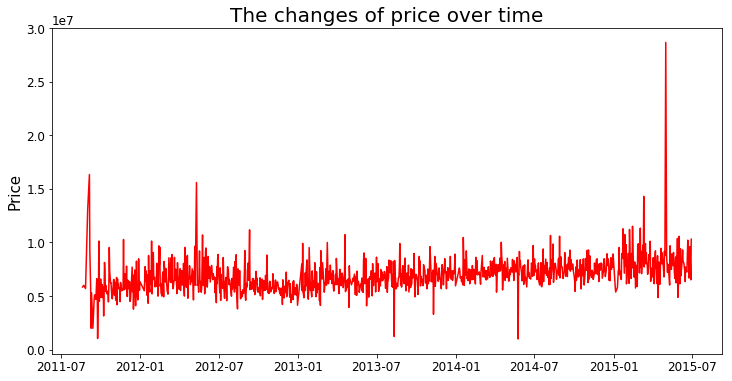

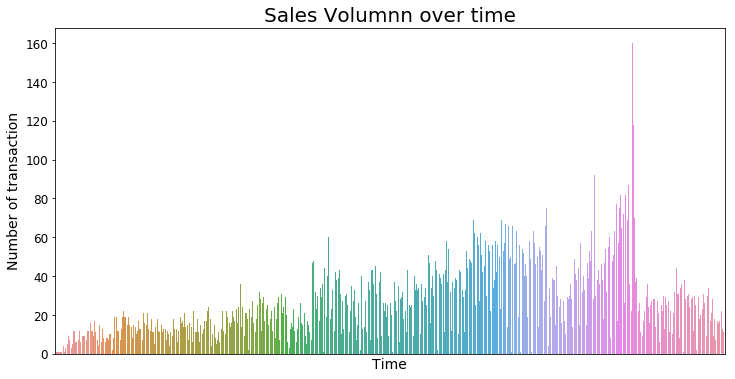

In [13]:
# Question: How does the price vary over the time horizon of the data set 
f, ax = plt.subplots(figsize=(12,6))
data['timestamp'] = pd.to_datetime(data['timestamp'])
price_ts = data.groupby('timestamp')[['price_doc']].mean()
# sns.regplot(x=price_ts.index, y="price_doc", data=price_ts, scatter=False, 
#            order=3, truncate=True)
plt.plot(price_ts['price_doc'], color='r')
plt.ylabel('Price', fontsize=15)
plt.title('The changes of price over time', fontsize=20)

import datetime
import matplotlib.dates as mdates
years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')
data['timestamp'] = pd.to_datetime(data['timestamp'])
ts_vc = data['timestamp'].value_counts().sort_index()
f, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=ts_vc.index, y=ts_vc, ax=ax)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xticklabels(labels=ts_vc.index, rotation=45, ha='right')
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Number of transaction", fontsize=14)
ax.set_title("Sales Volumnn over time", fontsize=20)

Text(0.5, 1.0, 'A seasonal component to home price')

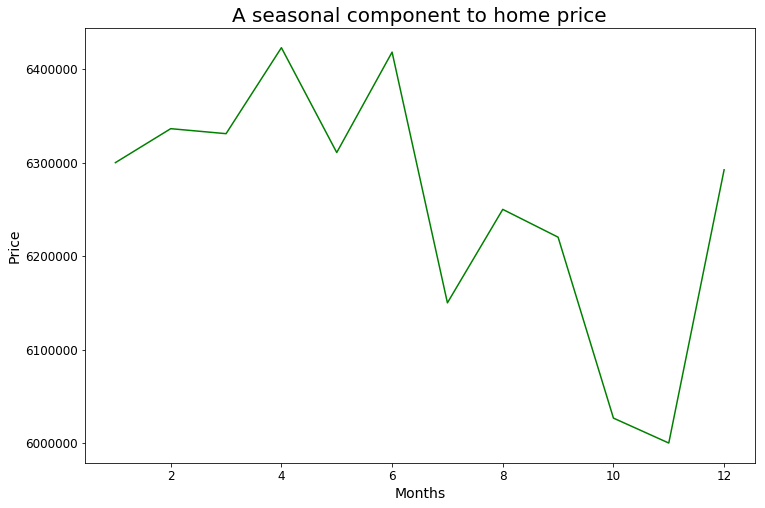

In [25]:
# Question: Is there a seasonal component to home prices in the course of a year
f, ax = plt.subplots(figsize=(12,8))
data['timestamp'] = pd.to_datetime(data['timestamp'])
ts_season = data.groupby(by=[data.timestamp.dt.month])[['price_doc']].median()
plt.plot(ts_season.index, ts_season, color='g')
ax.set_xlabel("Months", fontsize=14)
ax.set_ylabel("Price", fontsize=14)
ax.set_title("A seasonal component to home price", fontsize=20)

### Home State/Material

Text(0.5, 1.0, 'Log10 of median price by state of home')

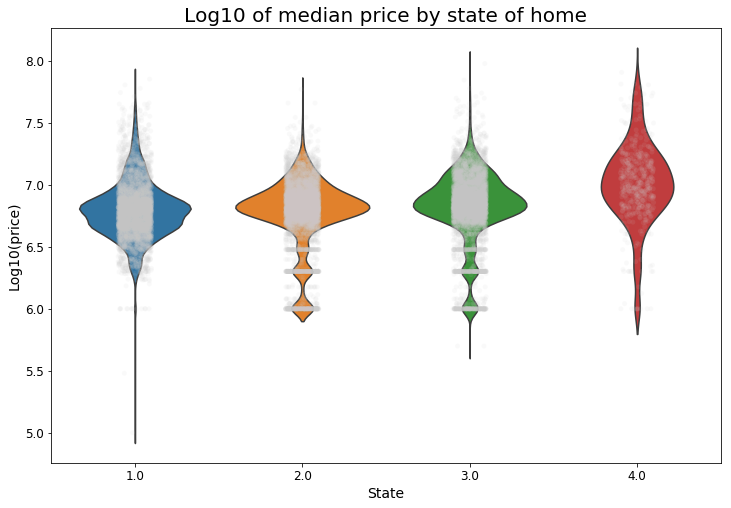

In [26]:
f, ax = plt.subplots(figsize=(12,8))
ind = data[data['state'].isnull()].index
data['price_doc_log'] = np.log10(data['price_doc'])
ax = sns.violinplot(x="state", y="price_doc_log", data=data.drop(ind), inner=None, alpha=0.6)
ax = sns.stripplot(x="state", y="price_doc_log", data=data.drop(ind), jitter=True, 
                   color=".8", alpha=0.1)
ax.set_xlabel("State", fontsize=14)
ax.set_ylabel("Log10(price)", fontsize=14)
ax.set_title("Log10 of median price by state of home", fontsize=20)

In [47]:
ind = data[data['state'].isnull()].index
aver_price_state = data.drop(ind).groupby(by='state')[['price_doc']].mean()
aver_price_state

,price_doc
state,
1.0,7.315440e+06
2.0,7.060396e+06
3.0,8.078316e+06
4.0,1.334547e+07


Text(0.5, 1.0, 'Distribution of price by build material')

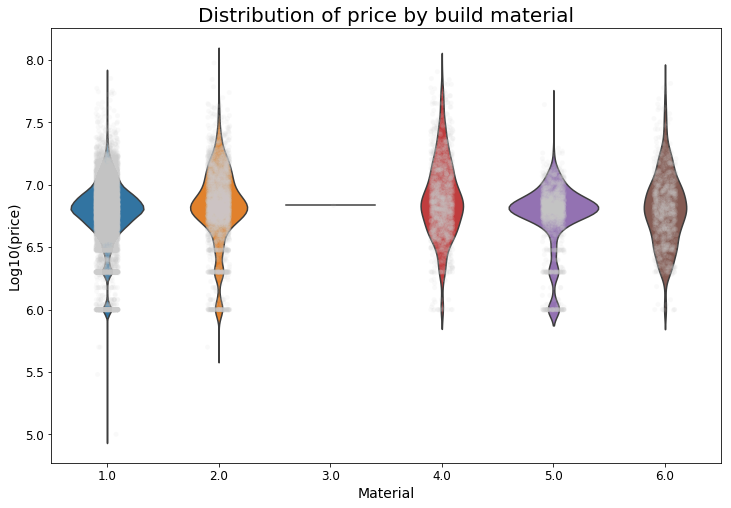

In [48]:
f, ax = plt.subplots(figsize=(12,8))
ind = data[data['material'].isnull()].index
data['price_doc_log'] = np.log10(data['price_doc'])
ax = sns.violinplot(x="material", y = "price_doc_log", data=data.drop(ind), inner=None)
ax = sns.stripplot(x="material", y = "price_doc_log", data=data.drop(ind), jitter=True,
                   color=".8", alpha=0.1)
ax.set_xlabel("Material", fontsize=14)
ax.set_ylabel("Log10(price)", fontsize=14)
ax.set_title("Distribution of price by build material", fontsize=20)

In [49]:
ind = data[data['material'].isnull()].index
aver_price_material = data.drop(ind).groupby(by='material')[['price_doc']].median()
aver_price_material

,price_doc
material,
1.0,6500000.0
2.0,6900000.0
3.0,6931143.0
4.0,7247869.5
5.0,6492000.0
6.0,6362318.0


### Floor of Home

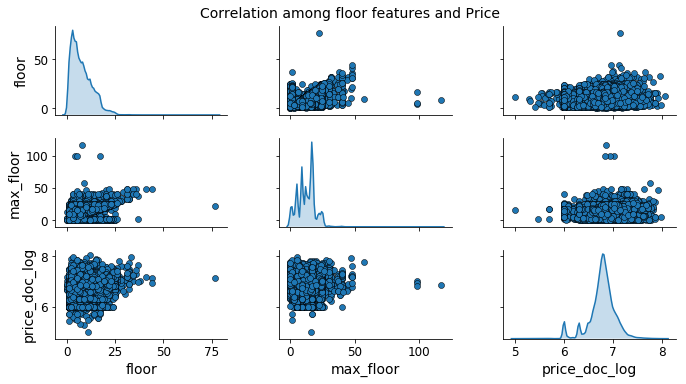

In [58]:
# Question: How does the floor feature compare with price?
pp = sns.pairplot(data[col_floor], height=1.8, aspect=1.8,
             plot_kws=dict(edgecolor="k", linewidth=0.5),
             diag_kind="kde", diag_kws=dict(shade=True))
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Correlation among floor features and Price', fontsize=14)

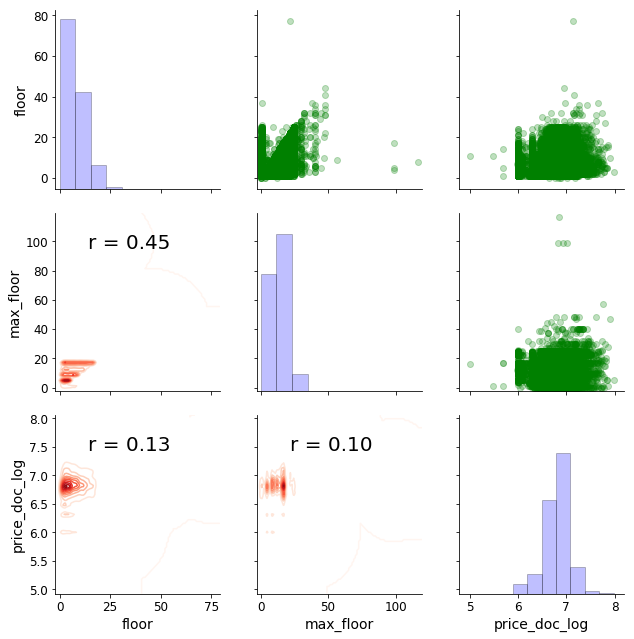

In [16]:
col_floor = ['floor', 'max_floor', 'price_doc_log']

def corr_func(x, y, **kwargs):
    r = np.corrcoef(x,y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r), 
                xy=(.2, .8), xycoords=ax.transAxes, size=20)
grid = sns.PairGrid(data=data[col_floor].dropna(), height=3)
grid.map_upper(plt.scatter, color='green', alpha = 0.25)
grid.map_diag(plt.hist, color='blue', edgecolor='black', alpha = 0.25)
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap=plt.cm.Reds)

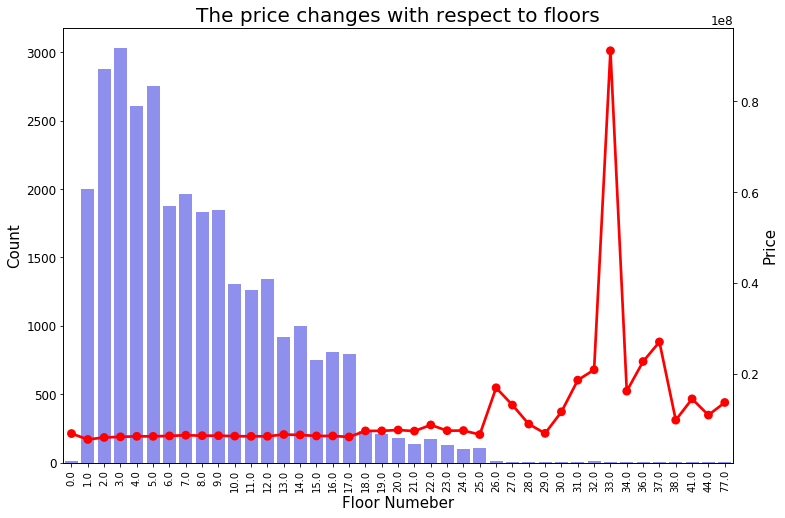

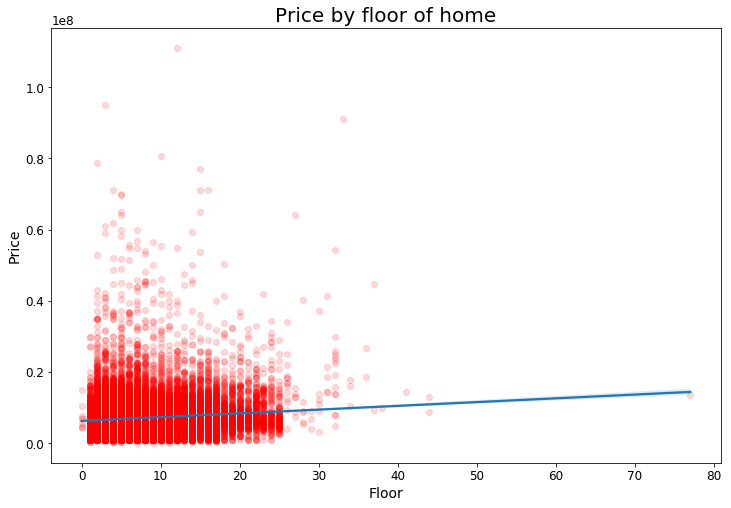

<Figure size 864x864 with 0 Axes>

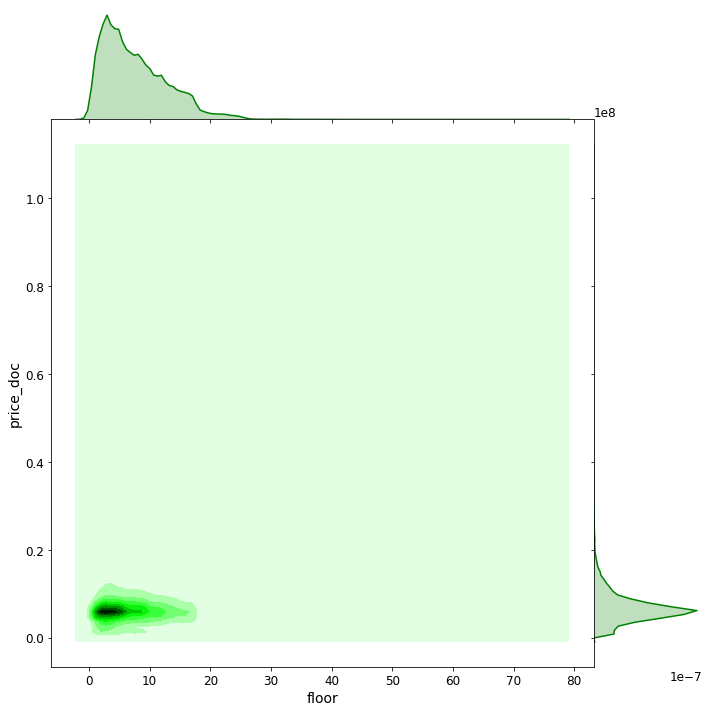

In [17]:
grouped_floor_price = data.groupby(by="floor")['price_doc'].aggregate(np.median).reset_index()
f, ax1 = plt.subplots(figsize=(12,8))
plt.xticks(rotation=90, fontsize=10)
sns.countplot(x="floor", data=data, ax=ax1, color="blue", alpha=0.5)
ax1.set_xlabel('Floor Numeber', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax2=ax1.twinx()
sns.pointplot(grouped_floor_price.floor.values, grouped_floor_price.price_doc.values,
              alpha=0.1, color="red", ax=ax2)
ax2.set_ylabel('Price', fontsize=15)
plt.title('The price changes with respect to floors', fontsize=20)

f, ax = plt.subplots(figsize=(12,8))
plt.scatter(x=data['floor'], y=data['price_doc'], c = 'r', alpha=0.15)
sns.regplot(x="floor", y="price_doc", data=data, scatter=False, truncate=True)
ax.set_xlabel("Floor", fontsize=14)
ax.set_ylabel("Price", fontsize=14)
ax.set_title("Price by floor of home", fontsize=20)

plt.figure(figsize=(12,12))
sns.jointplot(x="floor", y="price_doc", data=data, kind="kde", space=0, 
color="g", height = 10)

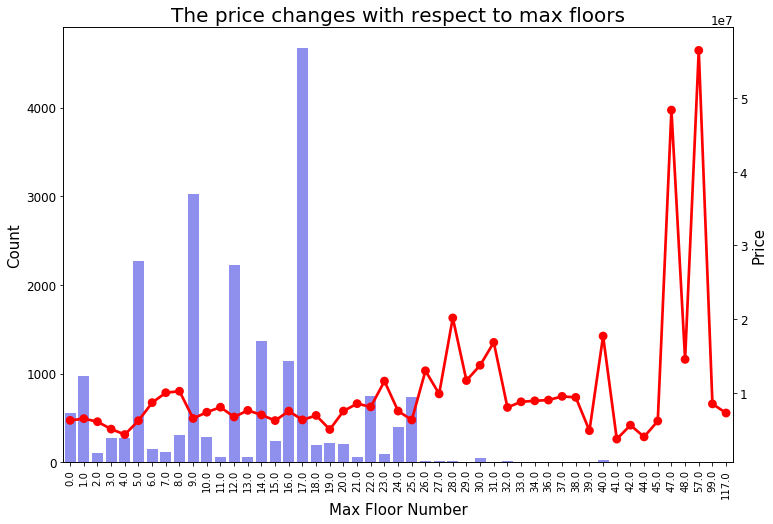

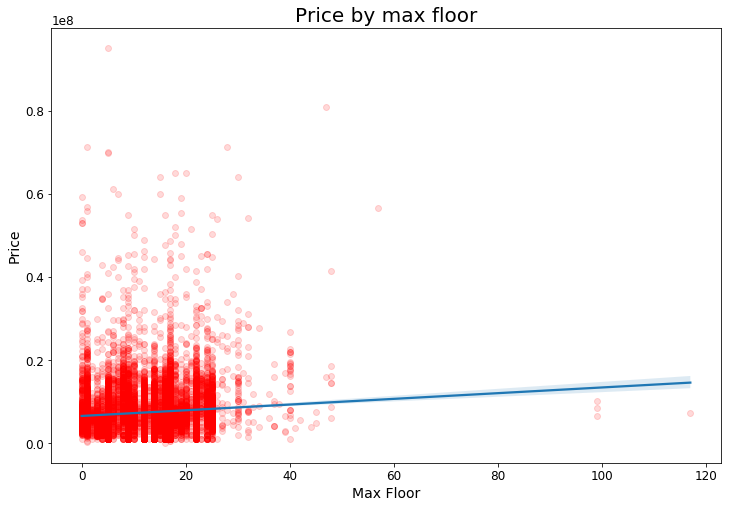

<Figure size 864x864 with 0 Axes>

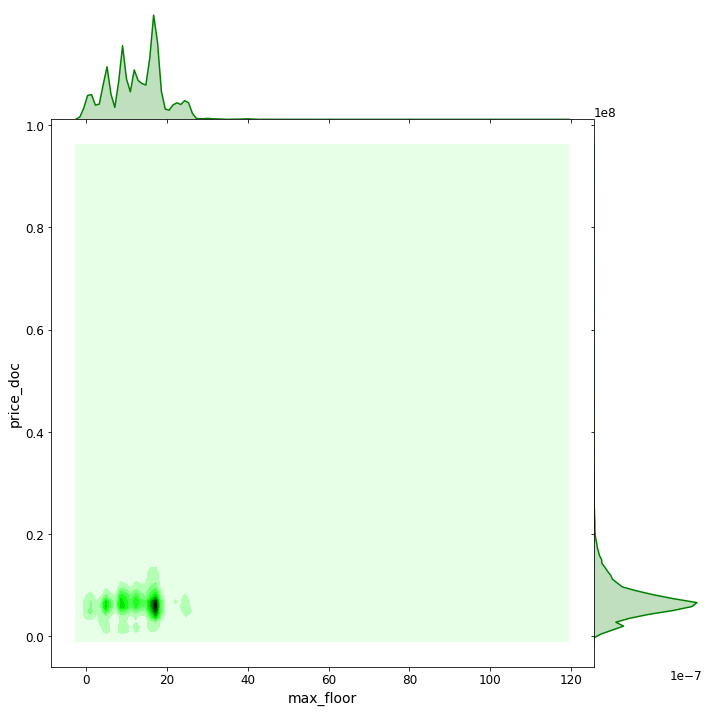

In [19]:
grouped_maxfloor_price = data.groupby(by="max_floor")['price_doc'].aggregate(np.median).reset_index()
f, ax1 = plt.subplots(figsize=(12,8))
plt.xticks(rotation=90, fontsize=10)
sns.countplot(x="max_floor", data=data, ax=ax1, color="blue", alpha=0.5)
ax1.set_xlabel("Max Floor Number", fontsize=15)
ax1.set_ylabel("Count", fontsize=15)
ax2=ax1.twinx()
sns.pointplot(grouped_maxfloor_price.max_floor.values, grouped_maxfloor_price.price_doc.values,
              alpha=0.1, color="red", ax=ax2)
ax2.set_ylabel("Price", fontsize=15)
plt.title('The price changes with respect to max floors', fontsize=20)

f, ax = plt.subplots(figsize=(12,8))
plt.scatter(x=data['max_floor'], y=data['price_doc'], c = 'r', alpha=0.15)
sns.regplot(x="max_floor", y="price_doc", data=data, scatter=False, truncate=True)
ax.set_xlabel("Max Floor", fontsize=14)
ax.set_ylabel("Price", fontsize=14)
ax.set_title("Price by max floor", fontsize=20)

plt.figure(figsize=(12,12))
sns.jointplot(x="max_floor", y="price_doc", data=data, kind="kde", space=0,
color="g", height = 10)

# Demographic Characteristics

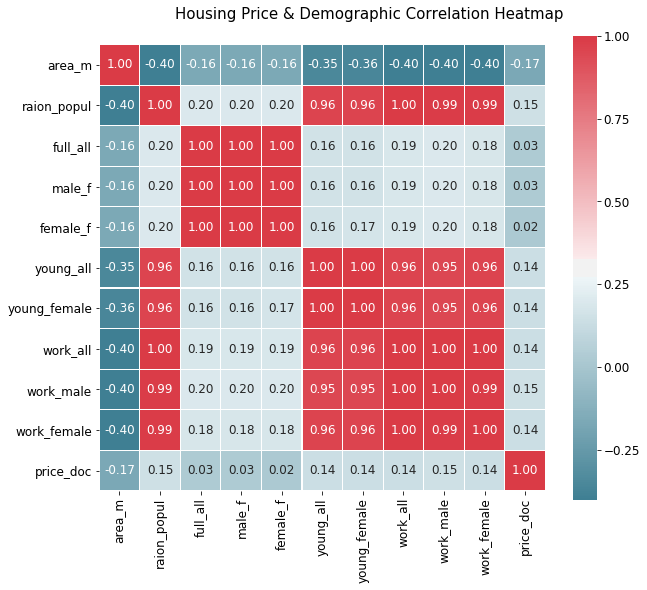

In [56]:
demo_var = ['area_m', 'raion_popul', 'full_all', 'male_f', 'female_f', 'young_all',
            'young_female', 'work_all', 'work_male', 'work_female', 'price_doc']

data_demo_var = data[demo_var]
f, ax = plt.subplots(figsize=(10,8))
corr_demo_var= data_demo_var.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
hm_demo_var = sns.heatmap(round(corr_demo_var,2), annot=True, ax=ax, square=True,
                 cmap=cmap, fmt='.2f', annot_kws={'size':12}, linewidth=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Housing Price & Demographic Correlation Heatmap', fontsize=15)

In [57]:
# How many unique districts are there? 
data['sub_area'].unique().shape[0]

146

Text(0.5, 1.0, 'Median home price by raion population density')

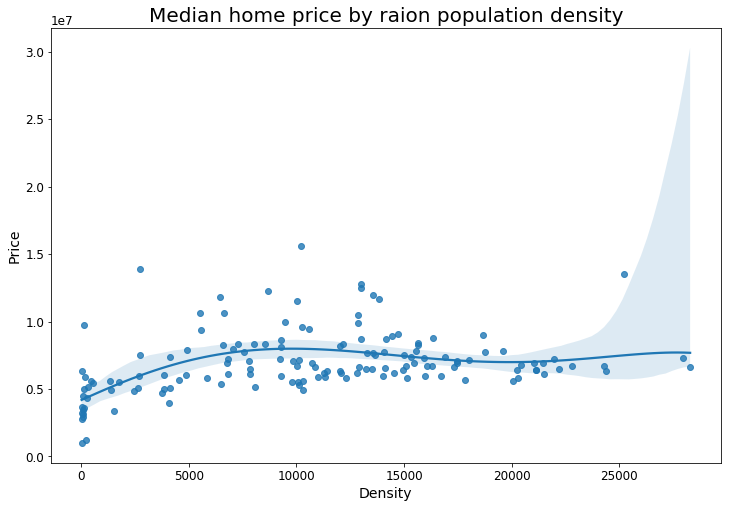

In [61]:
# Calculate the population density and check to see the correlation of density and price
data['area_km'] = data['area_m'] / 1000000
data['density'] = data['raion_popul'] / data['area_km']
f, ax = plt.subplots(figsize=(12,8))
demo_price = data.groupby(by='area_km')[['density','price_doc']].median()
sns.regplot(x="density", y="price_doc", data=demo_price, scatter=True, 
            order=5, truncate=True)
ax.set_xlabel('Density', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('Median home price by raion population density', fontsize=20)

These density numbers seem to make sense given that the population density of Moscow as whole is 8537/sq km. There are a few raions that seem to have a density of near zero, which seems odd. Home price does seem to increase with population density.

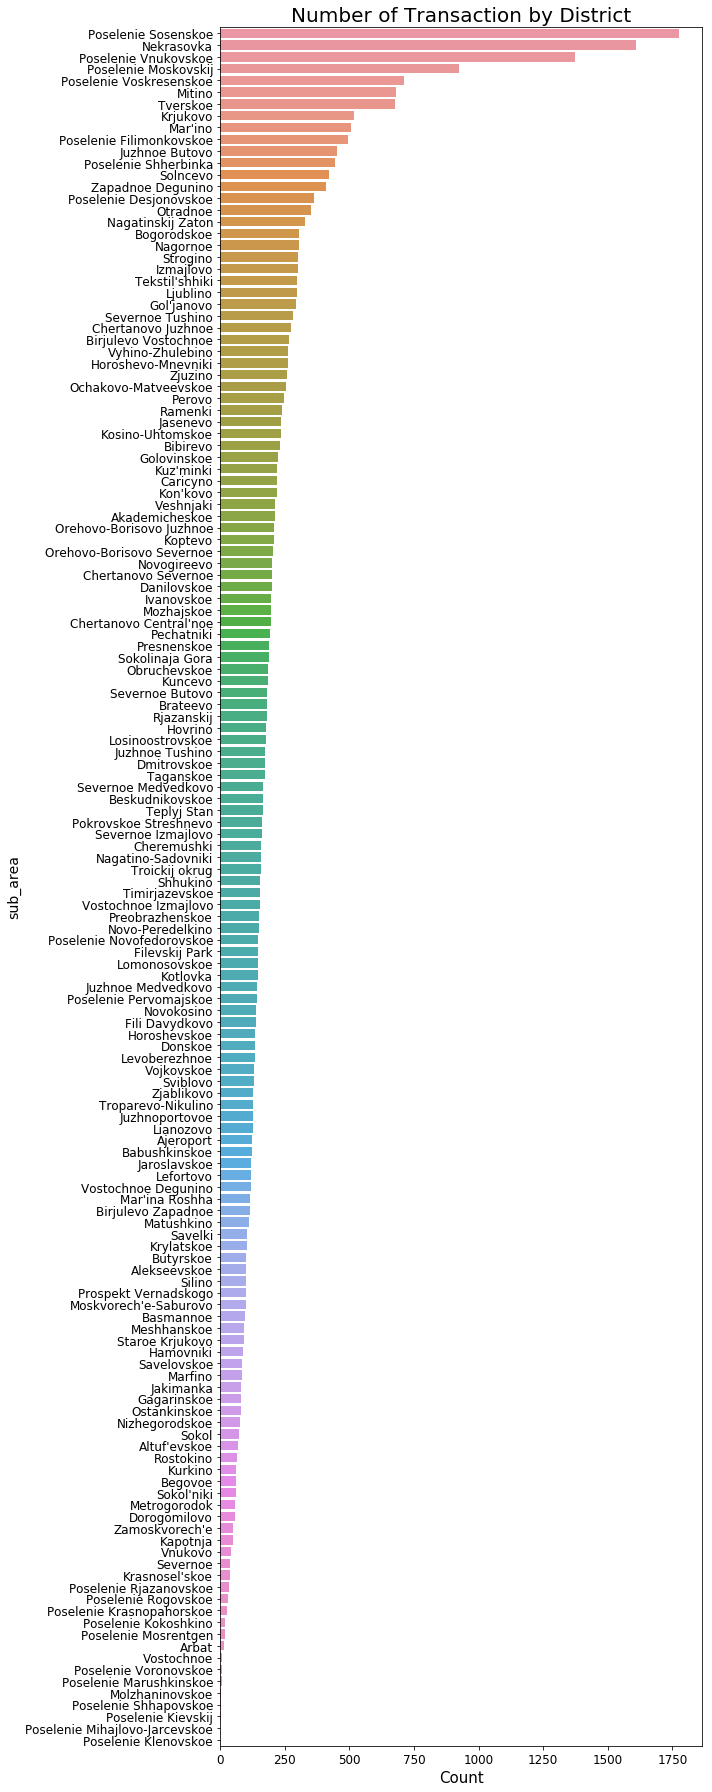

In [63]:
# Question: how many sales transactions are in each district. 
f, ax = plt.subplots(figsize=(10,25))
trans_dis_raw = data['sub_area'].value_counts()
trans_dis = pd.DataFrame({'sub_area': trans_dis_raw.index, 'count': trans_dis_raw.values})
ax = sns.barplot(x="count", y="sub_area", data=trans_dis, orient="h")
ax.set_xlabel('Count', fontsize=15)
ax.set_title('Number of Transaction by District', fontsize=20)
f.tight_layout()

Text(0.5, 1.0, 'Density of Price by sub areas')

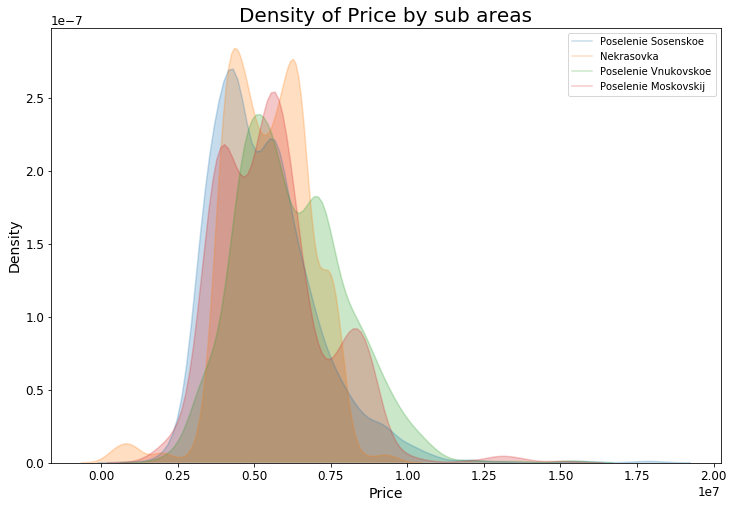

In [64]:
trans_dis_sort = list(trans_dis_raw[trans_dis_raw.values > 900].index)
f, ax = plt.subplots(figsize=(12,8))
for trans_type in trans_dis_sort:
    subset = data[data['sub_area'] == trans_type]
    sns.kdeplot(subset['price_doc'].dropna(), 
                label=trans_type, shade=True, alpha=.25)
ax.set_xlabel('Price',fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.set_title('Density of Price by sub areas', fontsize=20)

Text(0.5, 1.0, 'District mean home price by share of working age populaton')

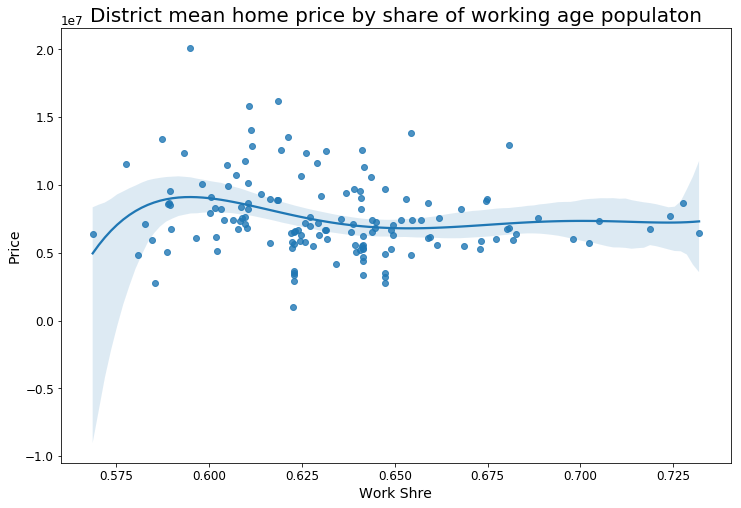

In [65]:
# Relationship between the share of the population that is working age and price
f, ax = plt.subplots(figsize=(12,8))
data['work_share'] = data['work_all']/data['raion_popul']
share_price = data.groupby(by='sub_area')[['work_share', 'price_doc']].mean()
sns.regplot(x="work_share", y="price_doc", data=share_price, scatter=True,
            order=5, truncate=True)
ax.set_xlabel('Work Shre', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('District mean home price by share of working age populaton', fontsize=20)

# School Charateristics

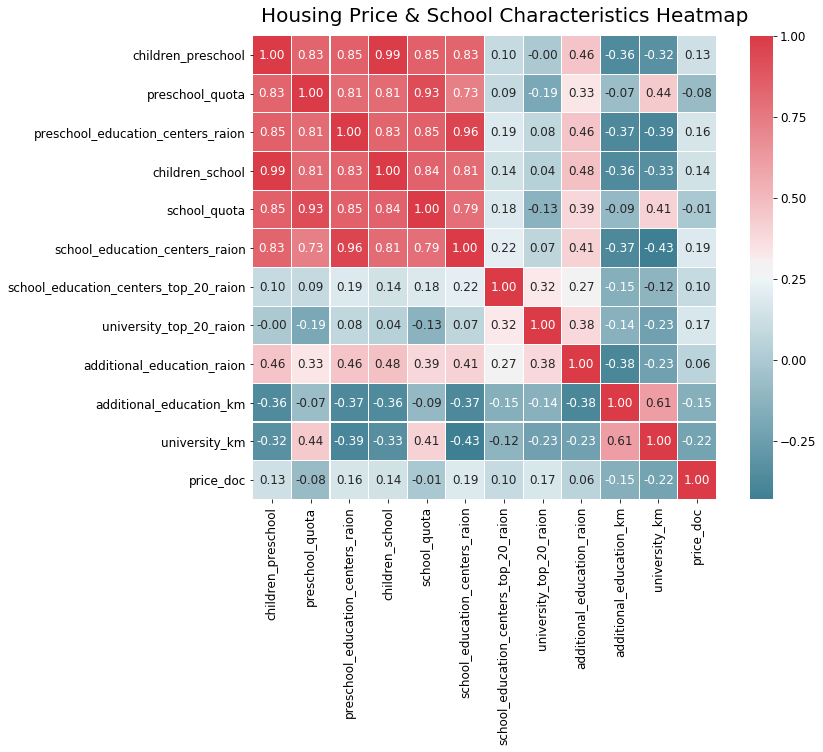

In [66]:
school_var = ['children_preschool', 'preschool_quota', 'preschool_education_centers_raion',
              'children_school', 'school_quota', 'school_education_centers_raion',
              'school_education_centers_top_20_raion', 'university_top_20_raion',
              'additional_education_raion', 'additional_education_km', 'university_km',
              'price_doc']

data_school_var = data[school_var]
f, ax = plt.subplots(figsize=(12,8))
corr_school_var = data_school_var.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
hm_school_var = sns.heatmap(round(corr_school_var,2), annot = True, ax=ax, square=True,
                            cmap=cmap, fmt='.2f', annot_kws={'size':12}, linewidth=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Housing Price & School Characteristics Heatmap', fontsize=20)

Text(0.5, 1.0, 'Distribution of home price of top university in Raion')

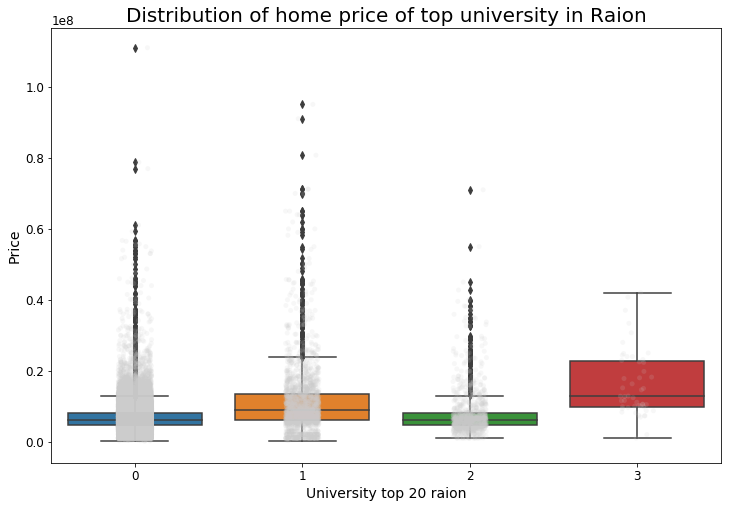

In [67]:
f, ax = plt.subplots(figsize=(12,8))
sns.stripplot(x="university_top_20_raion", y="price_doc", data=data, jitter=True,
              alpha=.15, color=".8")
sns.boxplot(x="university_top_20_raion", y="price_doc", data=data)
ax.set_xlabel('University top 20 raion', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('Distribution of home price of top university in Raion', fontsize=20)

Homes in a raion with 3 top 20 universities have the highest median home price, however, it is fairly close among 0, 1, and 2. There are very few home with 3 top universities 

In [68]:
# Question: How many districts there are with 3 universities 
data.loc[data['university_top_20_raion'] == 3, "sub_area"].unique()

array(["Zamoskvorech'e"], dtype=object)

# Cultural/Recretinal Characteristics

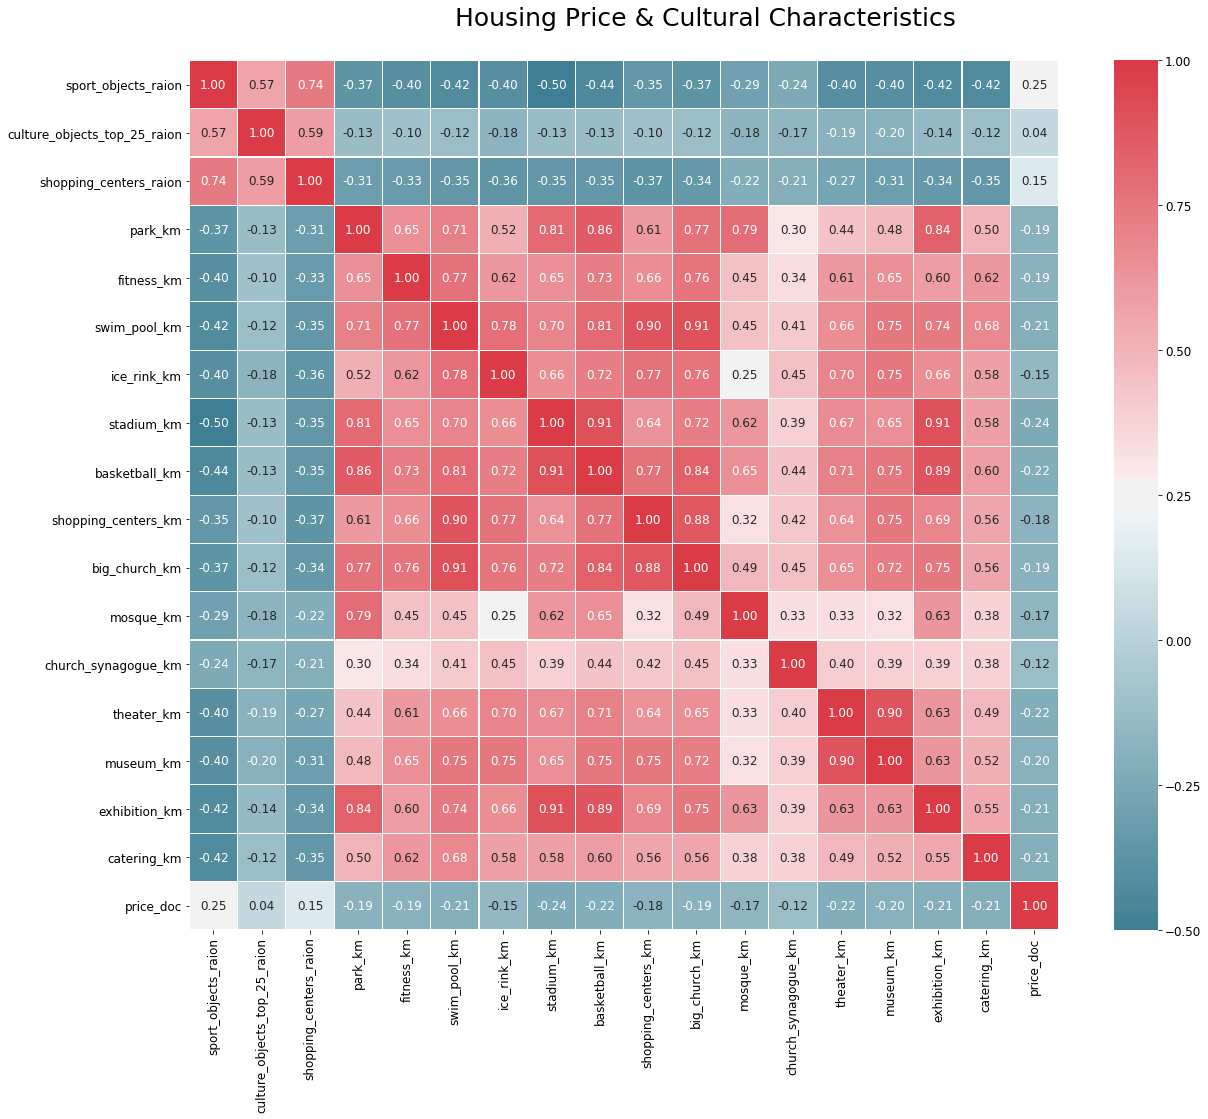

In [69]:
cult_vars = ['sport_objects_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion',
             'park_km', 'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km',
             'basketball_km', 'shopping_centers_km', 'big_church_km', 'mosque_km',
             'church_synagogue_km', 'theater_km', 'museum_km', 'exhibition_km',
             'catering_km', 'price_doc']
data_cult_vars = data[cult_vars]
f, ax = plt.subplots(figsize=(20,15))
corr_cult_vars = data_cult_vars.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
hm_cult_vars = sns.heatmap(round(corr_cult_vars,2), annot=True, ax=ax, square=True,
                           cmap=cmap, fmt='.2f', annot_kws={'size':12}, linewidth=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Housing Price & Cultural Characteristics', fontsize=25)

Text(0.5, 1.0, 'Median Raion home price of sports objects in Raion')

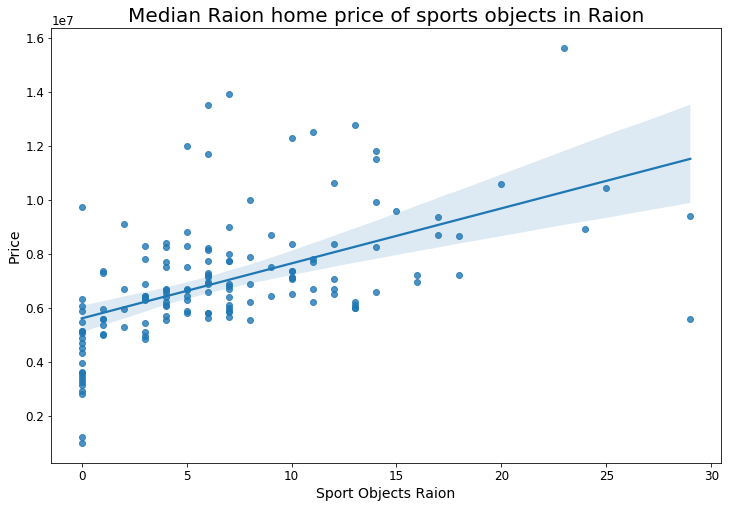

In [70]:
f, ax = plt.subplots(figsize=(12,8))
sport_price = data.groupby(by='sub_area')[['sport_objects_raion','price_doc']].median()
sns.regplot(x="sport_objects_raion", y="price_doc", data=sport_price, scatter=True,
            truncate=True)
ax.set_xlabel('Sport Objects Raion', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('Median Raion home price of sports objects in Raion', fontsize=20)

culture_objects_top_25_raion
0      6200000.0
1      8900000.0
2     15625000.0
3      9415000.0
4      7900000.0
10     5595230.5
Name: price_doc, dtype: float64

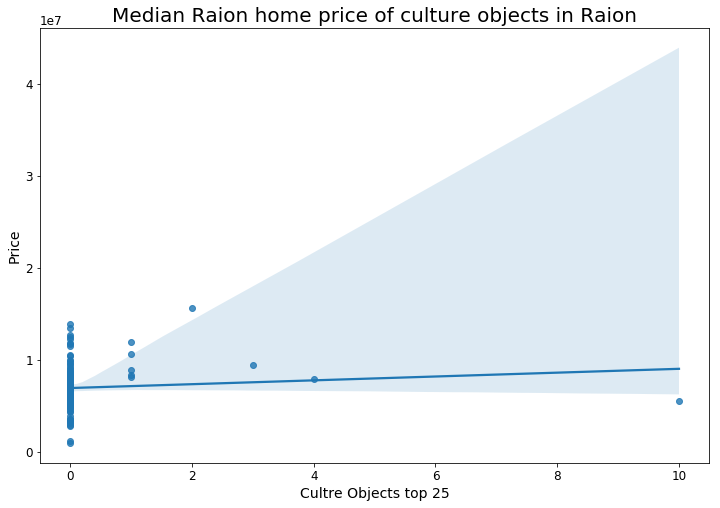

In [71]:
f, ax = plt.subplots(figsize=(12,8))
cult_price_top = data.groupby(by='sub_area')[['culture_objects_top_25_raion', 'price_doc']].median()
sns.regplot(x="culture_objects_top_25_raion", y="price_doc", data=cult_price_top, 
            scatter=True, truncate=True)
ax.set_xlabel('Cultre Objects top 25', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('Median Raion home price of culture objects in Raion', fontsize=20)
data.groupby(by='culture_objects_top_25_raion')['price_doc'].median()

Text(0.5, 1.0, 'Home price by distance to nearest park')

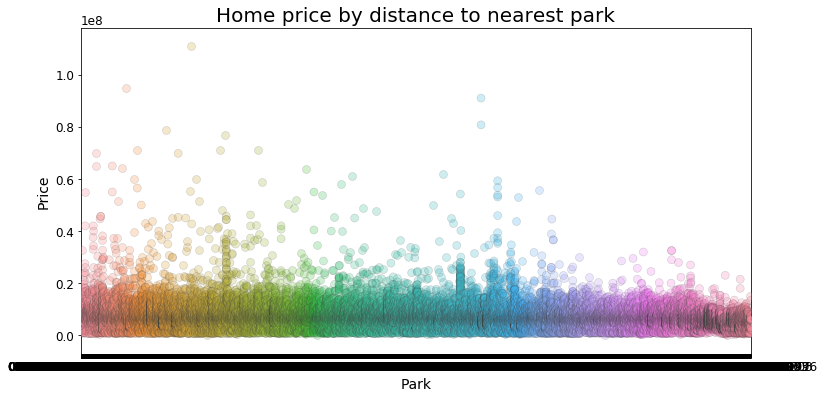

In [72]:
f, ax = plt.subplots(figsize=(12,6))
sns.stripplot(x="park_km", y="price_doc", data=data, jitter=0.25, 
              size=8, ax=ax, alpha=0.25, linewidth=.5)
ax.set_xlabel('Park', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('Home price by distance to nearest park', fontsize=20)

Text(0.5, 1.0, 'Home price by distance to nearest park')

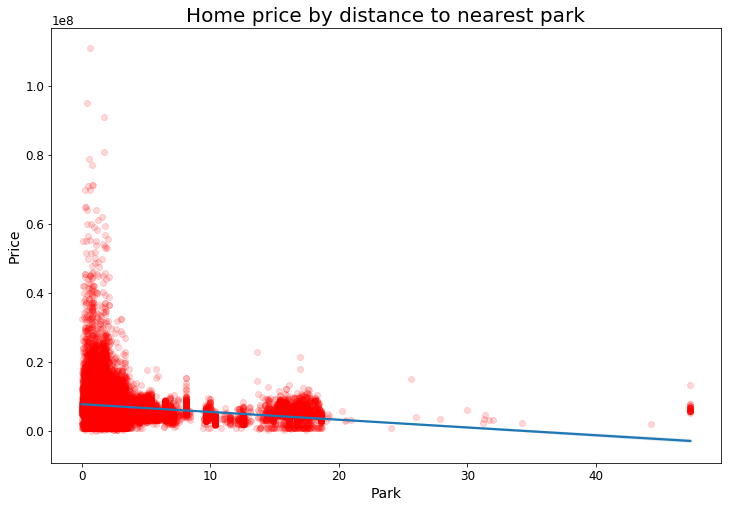

In [73]:
f, ax = plt.subplots(figsize=(12,8))
sns.regplot(x="park_km", y="price_doc", data=data, scatter=True, truncate=True,
            scatter_kws={'color':'r', 'alpha': .15})
ax.set_xlabel('Park', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('Home price by distance to nearest park', fontsize=20)

# Infrastructure Features

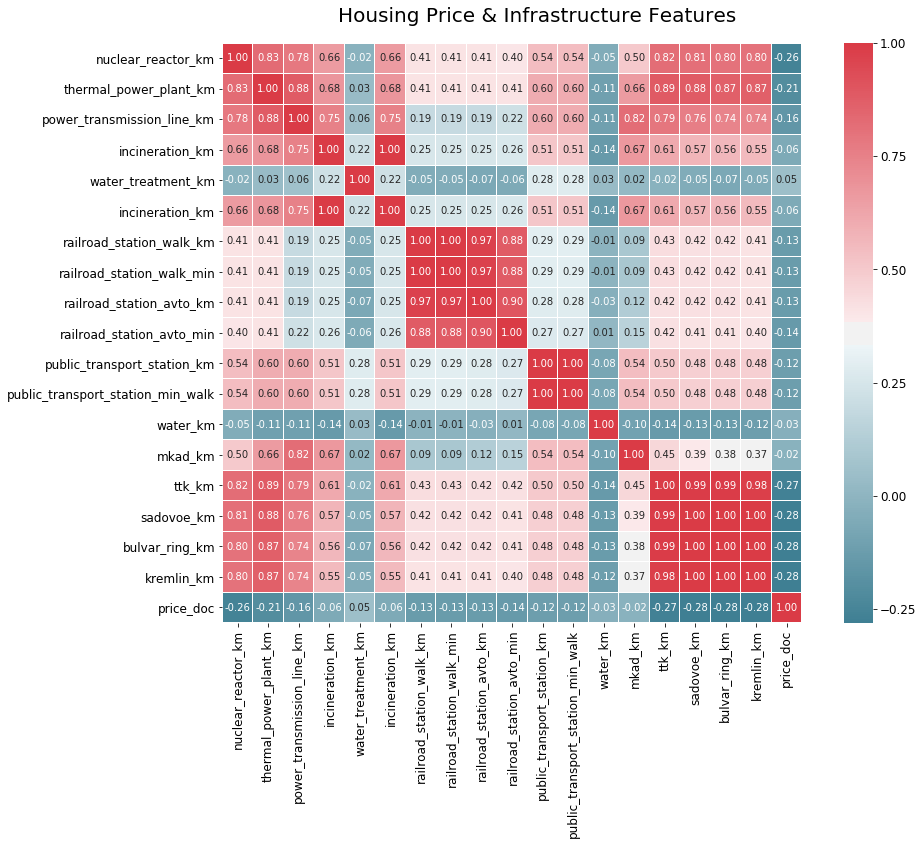

In [74]:
infras_vars = ['nuclear_reactor_km', 'thermal_power_plant_km', 'power_transmission_line_km',
               'incineration_km','water_treatment_km', 'incineration_km', 'railroad_station_walk_km',   
               'railroad_station_walk_min', 'railroad_station_avto_km', 'railroad_station_avto_min',  
               'public_transport_station_km', 'public_transport_station_min_walk', 'water_km',
               'mkad_km', 'ttk_km', 'sadovoe_km','bulvar_ring_km', 'kremlin_km', 'price_doc']
data_infras_vars = data[infras_vars]
f, ax = plt.subplots(figsize=(15,10))
corr_infras_vars = data_infras_vars.corr()
cmap = sns.diverging_palette(220,10,as_cmap=True)
hm_infras_vars = sns.heatmap(round(corr_infras_vars,2), annot=True, ax=ax, square=True,
                             cmap=cmap, fmt='.2f', annot_kws={'size':10}, linewidth=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Housing Price & Infrastructure Features', fontsize=20)

Text(0.5, 1.0, 'Home price by distance to Kremlin')

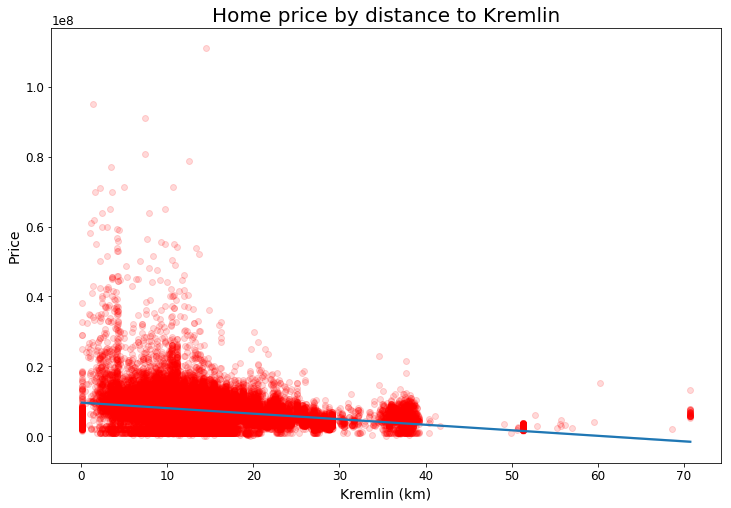

In [75]:
f, ax = plt.subplots(figsize=(12,8))
sns.regplot(x="kremlin_km", y="price_doc", data = data, scatter=True, truncate=True,
            scatter_kws={'color':'r', 'alpha':0.15})
ax.set_xlabel('Kremlin (km)', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('Home price by distance to Kremlin', fontsize=20)

Created on Mon Mar 11 14:58:46 2019

Reference: https://www.kaggle.com/c/sberbank-russian-housing-market

R code: https://www.kaggle.com/captcalculator/a-very-extensive-sberbank-exploratory-analysis